In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.xarray
%matplotlib qt

# Centre Voltage Sweep

[[ 4.16168895e+03 -3.11844226e+03  5.47011535e+02 -2.84592899e+01
  -1.86123341e+01  8.26244300e-03]
 [ 4.15146313e+03  3.09829665e+03  5.35103810e+02  2.63857442e+01
  -1.86952107e+01 -1.33786176e-02]]


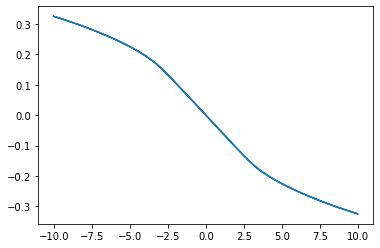

In [3]:
cen_v= pd.read_csv('./2019-06-29/phi0_daedalus_voltCenter_calib_2019-06-29_2.csv', comment="#")
cen_vn = cen_v[cen_v.Yfield>0]
cen_vp = cen_v[cen_v.Yfield<0]
cen_vp_coeff = np.polyfit(cen_vp.Yfield.values, cen_vp.V.values, 5)
cen_vn_coeff = np.polyfit(cen_vn.Yfield.values, cen_vn.V.values, 5)
cen_v_coeffs = np.asarray([cen_vn_coeff, cen_vp_coeff])
print(cen_v_coeffs)
cen_vp_fit = np.poly1d(cen_vp_coeff)
cen_vn_fit = np.poly1d(cen_vn_coeff)
plt.plot(cen_v.V.values, cen_v.Yfield.values)

### Radial B relation

In [4]:
def radialPolar(volts):
    vp = pd.read_csv('./2019-06-30/%gvp_daedalus_radialPolar_calib_A000.0_2019-06-30_1.csv' % volts, comment='#')
    vn = pd.read_csv('./2019-06-30/%gvn_daedalus_radialPolar_calib_A000.0_2019-06-30_1.csv' % volts, comment='#')
    
    vp = vp.assign(phi=lambda a: np.arctan2(a.Xfield, a.Yfield)*180/np.pi)
    vp = vp.assign(theta=lambda a: np.arctan2(a.Zfield, -a.Yfield)*180/np.pi)
    vp = vp.assign(Bmag=lambda a: np.sqrt(a.Yfield**2 + a.Zfield**2))
    Bcent = vp[abs(vp.R)<0.001].Bmag.values[0]
    vp = vp.assign(fieldRatio = lambda a: a.Bmag/Bcent)

    vn = vn.assign(phi=lambda a: np.arctan2(a.Xfield, a.Yfield)*180/np.pi)
    vn = vn.assign(theta=lambda a: np.arctan2(a.Zfield, a.Yfield)*180/np.pi)
    vn = vn.assign(Bmag=lambda a: np.sqrt(a.Yfield**2 + a.Zfield**2))
    Bcent = vn[abs(vn.R)<0.001].Bmag.values[0]
    vn = vn.assign(fieldRatio = lambda a: a.Bmag/Bcent)
    
    vprp = vp[vp.R>0]
    vprn = vp[vp.R<0]
    vnrp = vn[vn.R>0]
    vnrn = vn[vn.R<0]
    
    vnrp_fr_coeff = np.polyfit(vnrp.R, vnrp.fieldRatio, 10)
    vnrn_fr_coeff = np.polyfit(vnrn.R, vnrn.fieldRatio, 10)
    vprp_fr_coeff = np.polyfit(vprp.R, vprp.fieldRatio, 10)
    vprn_fr_coeff = np.polyfit(vprn.R, vprn.fieldRatio, 10)
    
    fr_coeffs = vnrp_fr_coeff, vnrn_fr_coeff, vprp_fr_coeff, vprn_fr_coeff
    
    np.savetxt("./icarusCalibCsv/icarus__fieldratio_calib.csv", fr_coeffs, delimiter=",")
    
    vnrp_fr_fit = np.poly1d(vnrp_fr_coeff)
    vnrn_fr_fit = np.poly1d(vnrn_fr_coeff)
    vprp_fr_fit = np.poly1d(vprp_fr_coeff)
    vprn_fr_fit = np.poly1d(vprn_fr_coeff)
    
    plt.plot(vnrp.R, vnrp_fr_fit(vnrp.R), label = volts)
    plt.plot(vnrn.R, vnrn_fr_fit(vnrn.R), label = volts)
    plt.plot(vprp.R, vprp_fr_fit(vprp.R), label = volts)
    plt.plot(vprn.R, vprn_fr_fit(vprn.R), label = volts)

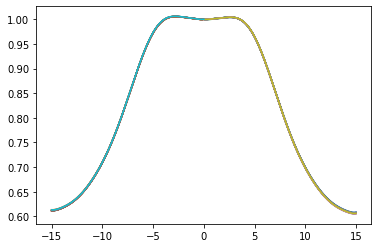

In [5]:
for i in range(1,11):
    radialPolar(i)

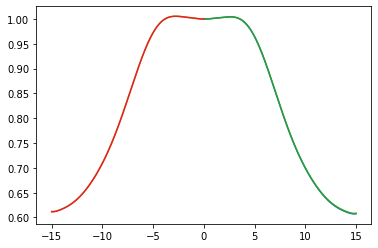

In [9]:
    volts = 3
    vp = pd.read_csv('./2019-06-30/%gvp_daedalus_radialPolar_calib_A000.0_2019-06-30_1.csv' % volts, comment='#')
    vn = pd.read_csv('./2019-06-30/%gvn_daedalus_radialPolar_calib_A000.0_2019-06-30_1.csv' % volts, comment='#')
    
    vp = vp.assign(phi=lambda a: np.arctan2(a.Xfield, a.Yfield)*180/np.pi)
    vp = vp.assign(theta=lambda a: np.arctan2(a.Zfield, -a.Yfield)*180/np.pi)
    vp = vp.assign(Bmag=lambda a: np.sqrt(a.Yfield**2 + a.Zfield**2))
    Bcent = vp[abs(vp.R)<0.001].Bmag.values[0]
    vp = vp.assign(fieldRatio = lambda a: a.Bmag/Bcent)

    vn = vn.assign(phi=lambda a: np.arctan2(a.Xfield, a.Yfield)*180/np.pi)
    vn = vn.assign(theta=lambda a: np.arctan2(a.Zfield, a.Yfield)*180/np.pi)
    vn = vn.assign(Bmag=lambda a: np.sqrt(a.Yfield**2 + a.Zfield**2))
    Bcent = vn[abs(vn.R)<0.001].Bmag.values[0]
    vn = vn.assign(fieldRatio = lambda a: a.Bmag/Bcent)
    
    vprp = vp[vp.R>0]
    vprn = vp[vp.R<0]
    vnrp = vn[vn.R>0]
    vnrn = vn[vn.R<0]
    
    vnrp_fr_coeff = np.polyfit(vnrp.R, vnrp.fieldRatio, 10)
    vnrn_fr_coeff = np.polyfit(vnrn.R, vnrn.fieldRatio, 10)
    vprp_fr_coeff = np.polyfit(vprp.R, vprp.fieldRatio, 10)
    vprn_fr_coeff = np.polyfit(vprn.R, vprn.fieldRatio, 10)
    
    fr_coeffs = vnrp_fr_coeff, vnrn_fr_coeff, vprp_fr_coeff, vprn_fr_coeff
    
    np.savetxt("./icarusCalibCsv/icarus__fieldratio_calib.csv", fr_coeffs, delimiter=",")
    
    vnrp_fr_fit = np.poly1d(vnrp_fr_coeff)
    vnrn_fr_fit = np.poly1d(vnrn_fr_coeff)
    vprp_fr_fit = np.poly1d(vprp_fr_coeff)
    vprn_fr_fit = np.poly1d(vprn_fr_coeff)
    
    plt.plot(vnrp.R, vnrp_fr_fit(vnrp.R), label = volts)
    plt.plot(vnrn.R, vnrn_fr_fit(vnrn.R), label = volts)
    plt.plot(vprp.R, vprp_fr_fit(vprp.R), label = volts)
    plt.plot(vprn.R, vprn_fr_fit(vprn.R), label = volts)

In [8]:
print(vp[abs(vp.R)<0.001].Bmag.values[0])

0.22496883249861066


In [46]:
def parse(volts):
    vp = pd.read_csv('./2019-06-30/%gvp_daedalus_radialPolar_calib_A000.0_2019-06-30_1.csv' % volts, comment='#')
    vn = pd.read_csv('./2019-06-30/%gvn_daedalus_radialPolar_calib_A000.0_2019-06-30_1.csv' % volts, comment='#')

    vp = vp.assign(phi=lambda a: np.arctan2(a.Xfield, a.Yfield)*180/np.pi)
    vp = vp.assign(theta=lambda a: np.arctan2(a.Zfield, -a.Yfield)*180/np.pi)
    vp = vp.assign(Bmag=lambda a: np.sqrt(a.Yfield**2 + a.Zfield**2))

    vn = vn.assign(phi=lambda a: np.arctan2(a.Xfield, a.Yfield)*180/np.pi)
    vn = vn.assign(theta=lambda a: np.arctan2(a.Zfield, a.Yfield)*180/np.pi)
    vn = vn.assign(Bmag=lambda a: np.sqrt(a.Yfield**2 + a.Zfield**2))

    vp_dv = {}
    vn_dv = {}
    for c in vp.columns[:]:
        vp_dv[c] = (["R"],vp[c])
        vn_dv[c] = (["R"],vn[c])
    vp_ds = xr.Dataset(vp_dv)
    vn_ds = xr.Dataset(vn_dv)

    vp_rp = vp[vp.R>0]
    vp_rn = vp[vp.R<0]
    vn_rp = vn[vn.R>0]
    vn_rn = vn[vn.R<0]

    vn_R_thetapos_coeff = np.polyfit(vn_rp.theta, vn_rp.R, 6)
    vn_R_thetaneg_coeff = np.polyfit(vn_rn.theta, vn_rn.R, 6)
    vn_R_thetapos = np.poly1d(vn_R_thetapos_coeff)
    vn_R_thetaneg = np.poly1d(vn_R_thetaneg_coeff)
    R_theta = vn_R_thetapos_coeff,vn_R_thetaneg_coeff
    
    np.savetxt("./icarusCalibCsv/icarus_%gV_radial_polar_calib.csv" % volts, R_theta, delimiter=",")

    bmag_vp_rp_coeff = np.polyfit(vp[vp.R>0].R, vp[vp.R>0].Bmag, 10)
    bmag_vp_rp = np.poly1d(bmag_vp_rp_coeff)

    bmag_vp_rn_coeff = np.polyfit(vp[vp.R<0].R, vp[vp.R<0].Bmag, 10)
    bmag_vp_rn = np.poly1d(bmag_vp_rn_coeff)

    bmag_vn_rp_coeff = np.polyfit(vn[vn.R>0].R, vn[vn.R>0].Bmag, 10)
    bmag_vn_rp = np.poly1d(bmag_vn_rp_coeff)

    bmag_vn_rn_coeff = np.polyfit(vn[vn.R<0].R, vn[vn.R<0].Bmag, 10)
    bmag_vn_rn = np.poly1d(bmag_vn_rn_coeff)

    V0 = cen_vn_fit(bmag_vn_rp(0.0)) # Voltage used for radial scan
    print(V0)
    Rpts_p = np.arange(0, 15, 0.1)
    Rpts_n = np.arange(-15, 0, 0.1)

    vcent_vp_rp = -V0/cen_vp_fit(-bmag_vp_rp(Rpts_p))
    vcent_vp_rn = -V0/cen_vp_fit(-bmag_vp_rn(Rpts_n))
    vcent_vn_rp = V0/cen_vn_fit(bmag_vn_rp(Rpts_p))
    vcent_vn_rn = V0/cen_vn_fit(bmag_vn_rn(Rpts_n))

    n = 10
    vcorr_vp_rp_coeff = np.polyfit(Rpts_p, vcent_vp_rp, n)
    vcorr_vp_rp = np.poly1d(vcorr_vp_rp_coeff)
    vcorr_vp_rn_coeff = np.polyfit(Rpts_n, vcent_vp_rn, n)
    vcorr_vp_rn = np.poly1d(vcorr_vp_rn_coeff)
    vcorr_vn_rp_coeff = np.polyfit(Rpts_p, vcent_vn_rp, n)
    vcorr_vn_rp = np.poly1d(vcorr_vn_rp_coeff)
    vcorr_vn_rn_coeff = np.polyfit(Rpts_n, vcent_vn_rn, n)
    vcorr_vn_rn = np.poly1d(vcorr_vn_rn_coeff)
    
    plt.plot(Rpts_p, vcorr_vn_rp(Rpts_p), label = '%g V' % volts)
    
    vcorr_coeffs = [vcorr_vn_rp_coeff, vcorr_vp_rp_coeff, vcorr_vn_rn_coeff,vcorr_vp_rn_coeff]
    np.savetxt("./icarusCalibCsv/icarus_%gV_volt_correction_calib.csv" % volts, vcorr_coeffs, delimiter=",")
    

-1.0103790665114323
-1.983223216201405
-3.000072215560183
-4.01047990423207
-4.984835073807472
-5.978393267032076
-6.991574410452265
-8.004766968094668
-9.010022052517606
-9.969741154286176


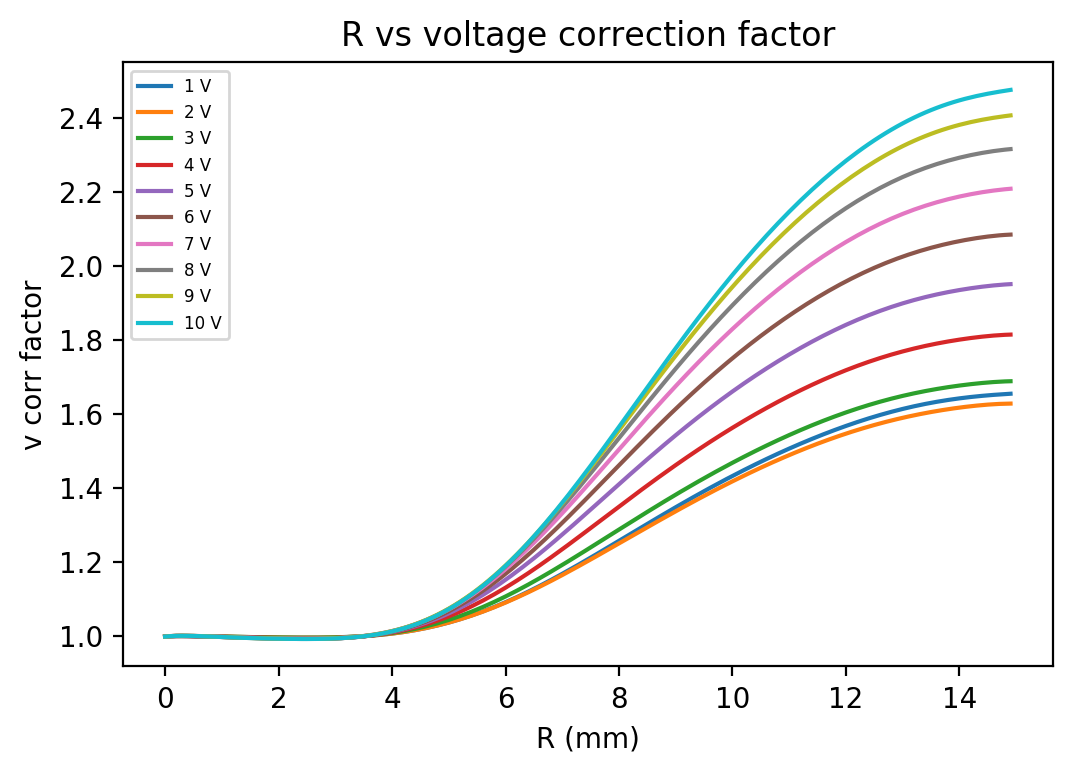

In [50]:
plt.figure(dpi = 200)
for i in range(1,11):
    parse(i)
    
plt.title('R vs voltage correction factor')
plt.xlabel('R (mm)')
plt.ylabel('v corr factor')
plt.legend(prop={'size': 6})

In [25]:
vp = pd.read_csv('./2019-06-30/1vp_daedalus_radialPolar_calib_A000.0_2019-06-30_1.csv', comment='#')
vn = pd.read_csv('./2019-06-30/1vn_daedalus_radialPolar_calib_A000.0_2019-06-30_1.csv', comment='#')

vp = vp.assign(phi=lambda a: np.arctan2(a.Xfield, a.Yfield)*180/np.pi)
vp = vp.assign(theta=lambda a: np.arctan2(a.Zfield, -a.Yfield)*180/np.pi)
vp = vp.assign(Bmag=lambda a: np.sqrt(a.Yfield**2 + a.Zfield**2))

vn = vn.assign(phi=lambda a: np.arctan2(a.Xfield, a.Yfield)*180/np.pi)
vn = vn.assign(theta=lambda a: np.arctan2(a.Zfield, a.Yfield)*180/np.pi)
vn = vn.assign(Bmag=lambda a: np.sqrt(a.Yfield**2 + a.Zfield**2))

vp_dv = {}
vn_dv = {}
for c in vp.columns[:]:
    vp_dv[c] = (["R"],vp[c])
    vn_dv[c] = (["R"],vn[c])
vp_ds = xr.Dataset(vp_dv)
vn_ds = xr.Dataset(vn_dv)

vp_rp = vp[vp.R>0]
vp_rn = vp[vp.R<0]
vn_rp = vn[vn.R>0]
vn_rn = vn[vn.R<0]

vn_R_thetapos_coeff = np.polyfit(vn_rp.theta, vn_rp.R, 6)
vn_R_thetaneg_coeff = np.polyfit(vn_rn.theta, vn_rn.R, 6)
vn_R_thetapos = np.poly1d(vn_R_thetapos_coeff)
vn_R_thetaneg = np.poly1d(vn_R_thetaneg_coeff)
R_theta = vn_R_thetapos_coeff,vn_R_thetaneg_coeff
print(R_theta)

(array([-1.92548234e-10,  4.78121166e-08, -4.19621977e-06,  1.72609644e-04,
       -3.75802672e-03,  1.60201783e-01, -7.22839424e-03]), array([1.79993350e-10, 4.50573240e-08, 3.96599304e-06, 1.61750156e-04,
       3.45019773e-03, 1.58396944e-01, 9.46732568e-02]))


### Change radial polar calib filename

In [30]:
np.savetxt("./icarusCalibCsv/icarus_1V_radial_polar_calib.csv", R_theta, delimiter=",")

bmag_vp_rp_coeff = np.polyfit(vp[vp.R>0].R, vp[vp.R>0].Bmag, 10)
bmag_vp_rp = np.poly1d(bmag_vp_rp_coeff)

bmag_vp_rn_coeff = np.polyfit(vp[vp.R<0].R, vp[vp.R<0].Bmag, 10)
bmag_vp_rn = np.poly1d(bmag_vp_rn_coeff)

bmag_vn_rp_coeff = np.polyfit(vn[vn.R>0].R, vn[vn.R>0].Bmag, 10)
bmag_vn_rp = np.poly1d(bmag_vn_rp_coeff)

bmag_vn_rn_coeff = np.polyfit(vn[vn.R<0].R, vn[vn.R<0].Bmag, 10)
bmag_vn_rn = np.poly1d(bmag_vn_rn_coeff)

V0 = cen_vn_fit(bmag_vn_rp(0.0)) # Voltage used for radial scan
Rpts_p = np.arange(0, 15, 0.1)
Rpts_n = np.arange(-15, 0, 0.1)

vcent_vp_rp = -V0/cen_vp_fit(-bmag_vp_rp(Rpts_p))
vcent_vp_rn = -V0/cen_vp_fit(-bmag_vp_rn(Rpts_n))
vcent_vn_rp = V0/cen_vn_fit(bmag_vn_rp(Rpts_p))
vcent_vn_rn = V0/cen_vn_fit(bmag_vn_rn(Rpts_n))

n = 10
vcorr_vp_rp_coeff = np.polyfit(Rpts_p, vcent_vp_rp, n)
vcorr_vp_rp = np.poly1d(vcorr_vp_rp_coeff)
vcorr_vp_rn_coeff = np.polyfit(Rpts_n, vcent_vp_rn, n)
vcorr_vp_rn = np.poly1d(vcorr_vp_rn_coeff)
vcorr_vn_rp_coeff = np.polyfit(Rpts_p, vcent_vn_rp, n)
vcorr_vn_rp = np.poly1d(vcorr_vn_rp_coeff)
vcorr_vn_rn_coeff = np.polyfit(Rpts_n, vcent_vn_rn, n)
vcorr_vn_rn = np.poly1d(vcorr_vn_rn_coeff)

print(vcorr_vn_rp_coeff, '\n', vcorr_vp_rp_coeff, '\n', vcorr_vn_rn_coeff, '\n',vcorr_vp_rn_coeff)

[-3.67441105e-10  3.04517578e-08 -1.06050036e-06  2.00542565e-05
 -2.21551898e-04  1.43097670e-03 -5.21368764e-03  1.09866783e-02
 -1.27999248e-02  4.79009479e-03  9.99691763e-01] 
 [-4.57474711e-10  3.63031403e-08 -1.21763788e-06  2.23064811e-05
 -2.40170704e-04  1.52155238e-03 -5.48153192e-03  1.15800780e-02
 -1.39902795e-02  6.00777421e-03  1.01573950e+00] 
 [-2.32153622e-10 -2.05084613e-08 -7.54213240e-07 -1.49340511e-05
 -1.71257899e-04 -1.13596345e-03 -4.19186403e-03 -8.94005027e-03
 -1.09934534e-02 -4.18782456e-03  9.99838892e-01] 
 [-4.33536865e-10 -3.42722831e-08 -1.15293275e-06 -2.13358393e-05
 -2.33831937e-04 -1.52082325e-03 -5.67570472e-03 -1.23909907e-02
 -1.53233834e-02 -6.57179544e-03  1.01514511e+00]


### Change filename

In [31]:
vcorr_coeffs = [vcorr_vn_rp_coeff, vcorr_vp_rp_coeff, vcorr_vn_rn_coeff,vcorr_vp_rn_coeff]
np.savetxt("./icarusCalibCsv/icarus_1V_volt_correction_calib.csv", vcorr_coeffs, delimiter=",")

In [32]:
plt.plot(Rpts_p, vcent_vp_rp, 'r', markersize = 2)
plt.plot(Rpts_p, vcorr_vp_rp(Rpts_p), 'b')
plt.xlabel('R (mm)')
plt.ylabel('V correction factor')
plt.title('Scale factor for a radial point to get the same field')

Text(0.5, 1.0, 'Scale factor for a radial point to get the same field')

Text(0.5, 1.0, 'Scale factor for a radial point to get the same field')

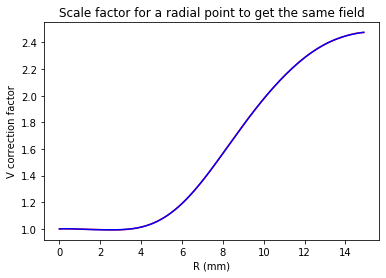

In [28]:
plt.plot(Rpts_p, vcent_vn_rp, 'r', markersize = 2)
plt.plot(Rpts_p, vcorr_vn_rp(Rpts_p), 'b')
plt.xlabel('R (mm)')
plt.ylabel('V correction factor')
plt.title('Scale factor for a radial point to get the same field')

Text(0.5, 1.0, 'Scale factor for a radial point to get the same field')

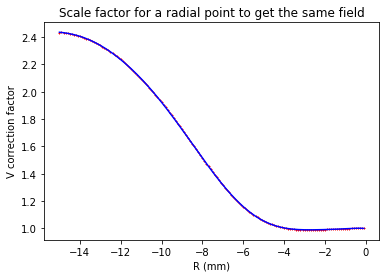

In [29]:
plt.plot(Rpts_n, vcent_vp_rn, 'r+', markersize = 2)
plt.plot(Rpts_n, vcorr_vp_rn(Rpts_n), 'b')
plt.xlabel('R (mm)')
plt.ylabel('V correction factor')
plt.title('Scale factor for a radial point to get the same field')

Text(0.5, 1.0, 'Scale factor for a radial point to get the same field')

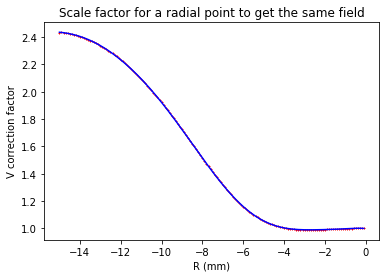

In [30]:
plt.plot(Rpts_n, vcent_vn_rn, 'r+', markersize = 2)
plt.plot(Rpts_n, vcorr_vn_rn(Rpts_n), 'b')
plt.xlabel('R (mm)')
plt.ylabel('V correction factor')
plt.title('Scale factor for a radial point to get the same field')